<a href="https://colab.research.google.com/github/raghavdypimr/Celebalrmp/blob/main/CSI_Finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
import warnings

In [2]:
# Set up
np.random.seed(42)  # For reproducibility

In [3]:
#Labels of the given dataset
column_names = [
    'duration','protocol_type','service','flag','src_bytes','dst_bytes','land',
    'wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised',
    'root_shell','su_attempted','num_root','num_file_creations','num_shells',
    'num_access_files','num_outbound_cmds','is_host_login','is_guest_login',
    'count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate',
    'same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count',
    'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate',
    'dst_host_rerror_rate','dst_host_srv_rerror_rate',
    'outcome'
]

In [4]:
#Importing google library to load the Dataset in Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Loading the dataset in the Colob by Google Drive
df = pd.read_csv("/content/drive/MyDrive/kddcup.data.corrected", header=None, names=column_names)

In [7]:
# Encode categorical variables if any
features = pd.get_dummies(column_names, drop_first=True)




In [8]:
# Convert any non-numeric columns to numeric (if necessary)
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [9]:
## Display the first five rows of the dataset
df[0:5]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,NaN,NaN,NaN,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,NaN
1,0,NaN,NaN,NaN,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,NaN
2,0,NaN,NaN,NaN,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,NaN
3,0,NaN,NaN,NaN,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,NaN
4,0,NaN,NaN,NaN,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,NaN


In [10]:
# Drop non-numeric columns for simplicity
df.drop(columns=["protocol_type", "service", "flag"], inplace=True)

In [11]:
# Handle missing values if any
df.fillna(0, inplace=True)

In [12]:
# Verify that the DataFrame contains only numeric data
print(df.dtypes)

duration                         int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate                float64
rerror_rate                    float64
srv_rerror_rate                float64
same_srv_rate            

In [13]:
# Ensure no infinite values are present
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)

In [14]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [15]:
# Verify the shape of X_scaled
print("Shape of X_scaled:", X_scaled.shape)
print("First 5 rows of X_scaled:\n", X_scaled[:5])

Shape of X_scaled: (4898431, 39)
First 5 rows of X_scaled:
 [[-6.68331854e-02 -1.72038228e-03  6.81884351e-02 -2.39084686e-03
  -1.51391734e-02 -1.10348462e-03 -2.65207600e-02 -4.39091558e-03
   2.44279187e+00 -2.09732783e-03 -8.25770840e-03 -4.54646139e-03
  -3.28458917e-03 -9.57233922e-03 -8.50457842e-03 -2.87561127e-02
   0.00000000e+00 -6.38979005e-04 -2.89113034e-02 -1.57541507e+00
  -1.19624324e+00 -4.66042614e-01 -4.65755574e-01 -2.48285775e-01
  -2.48130352e-01  5.39733093e-01 -2.56056520e-01 -2.01059296e-01
  -3.63913926e+00 -1.78651044e+00 -1.83302273e+00 -2.82939000e-01
  -1.25793664e+00 -1.56668488e-01 -4.66404784e-01 -4.65453641e-01
  -2.50831829e-01 -2.49631966e-01  0.00000000e+00]
 [-6.68331854e-02 -1.77667956e-03  5.32451452e-03 -2.39084686e-03
  -1.51391734e-02 -1.10348462e-03 -2.65207600e-02 -4.39091558e-03
   2.44279187e+00 -2.09732783e-03 -8.25770840e-03 -4.54646139e-03
  -3.28458917e-03 -9.57233922e-03 -8.50457842e-03 -2.87561127e-02
   0.00000000e+00 -6.38979005e-

In [ ]:
# Visualize data distribution before and after scaling
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df)
plt.title('Data Distribution Before Scaling')

plt.subplot(1, 2, 2)
sns.boxplot(data=pd.DataFrame(X_scaled, columns=df.columns))
plt.title('Data Distribution After Scaling')

plt.tight_layout()
plt.show()

In [ ]:
# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.1, random_state=42)

In [ ]:
# Fit the model
try:
    iso_forest.fit(X_scaled)
    print("Model fitting successful.")
except ValueError as e:
    print(f"Error during model fitting: {e}")


Model fitting successful.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


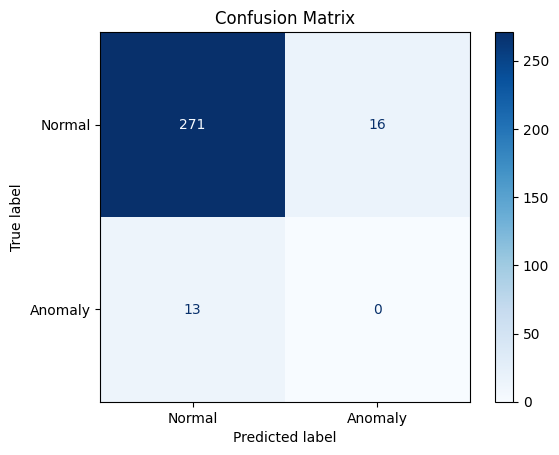

Confusion Matrix:
 [[271  16]
 [ 13   0]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

df = pd.DataFrame({
    'feature1': np.random.randn(1000),
    'feature2': np.random.randn(1000),
    'feature3': np.random.randn(1000),
    'feature4': np.random.randn(1000),
    'target': np.random.choice([0, 1], 1000, p=[0.95, 0.05])  # 95% normal, 5% anomalies
})

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Isolation Forest model
model = IsolationForest(contamination=0.05, random_state=42)
model.fit(X_train)

# Make predictions
# Isolation Forest returns -1 for anomalies and 1 for normal points
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Convert predictions to binary format (0 for normal, 1 for anomalies)
y_pred_train = np.where(y_pred_train == 1, 0, 1)
y_pred_test = np.where(y_pred_test == 1, 0, 1)

# Generate confusion matrix for the test set
cm = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Anomaly'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:\n", cm)

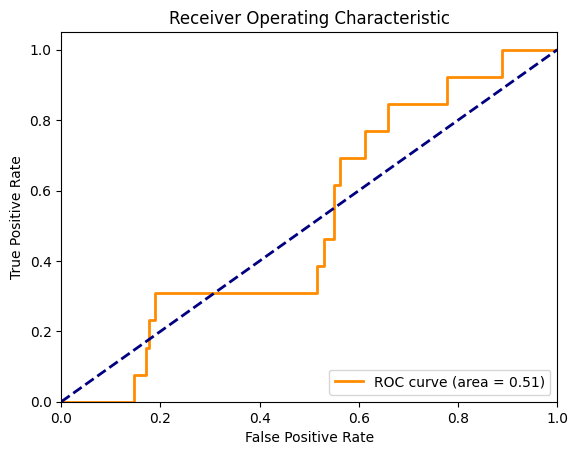

In [ ]:
from sklearn.metrics import roc_curve, auc

# True labels and prediction scores for ROC curve
y_true = y_test
y_scores = model.decision_function(X_test)

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Predict anomalies (1 for normal, -1 for anomaly)
try:
    predictions = iso_forest.predict(X_scaled)
    print("Prediction successful.")
except ValueError as e:
    print(f"Error during prediction: {e}")

Prediction successful.


In [ ]:
# Convert predictions to 0 (normal) and 1 (anomaly)
df['anomaly'] = np.where(predictions == -1, 1, 0)

In [ ]:
# Count the number of anomalies
num_anomalies = df['anomaly'].sum()
num_total = df.shape[0]


In [ ]:
# Print results
print(f"Total number of data points: {num_total}")
print(f"Number of anomalies detected: {num_anomalies}")
print(f"Percentage of anomalies: {num_anomalies / num_total * 100:.2f}%")

Total number of data points: 97628
Number of anomalies detected: 9762
Percentage of anomalies: 10.00%


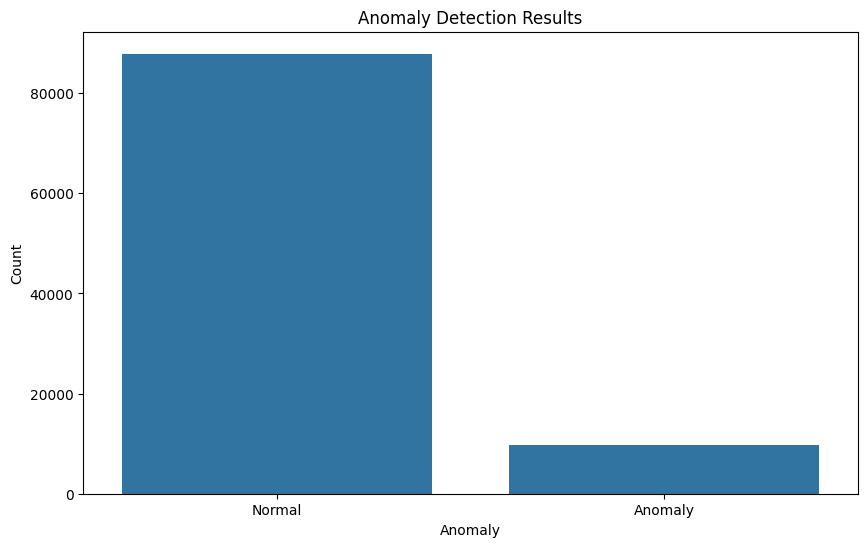

In [ ]:
# Plot the anomalies
plt.figure(figsize=(10, 6))
sns.countplot(x='anomaly', data=df)
plt.title('Anomaly Detection Results')
plt.xlabel('Anomaly')
plt.ylabel('Count')
plt.xticks([0, 1], ['Normal', 'Anomaly'])
plt.show()

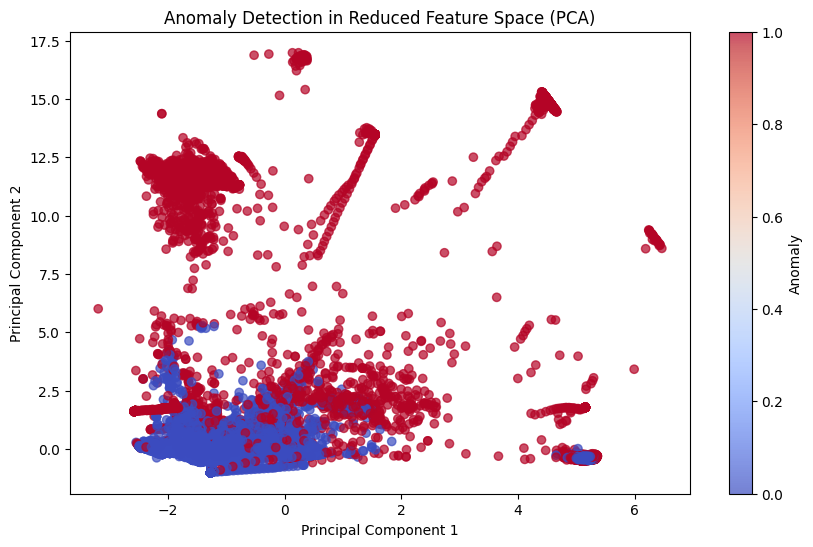

In [ ]:
# Visualize the anomalies in a reduced feature space using PCA
# Ensure X_scaled is a numpy array and has no missing or infinite values
if isinstance(X_scaled, np.ndarray) and not np.any(np.isnan(X_scaled)) and not np.any(np.isinf(X_scaled)):
    try:
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X_scaled)

        plt.figure(figsize=(10, 6))
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['anomaly'], cmap='coolwarm', alpha=0.7)
        plt.title('Anomaly Detection in Reduced Feature Space (PCA)')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.colorbar(label='Anomaly')
        plt.show()
    except Exception as e:
        print(f"Error during PCA transformation or plotting: {e}")
else:
    print("X_scaled is not suitable for PCA transformation.")